# Задание по программированию: Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

Введение

В этом задании вы научитесь решать задачи оптимизации с помощью библиотеки SciPy. Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.

## Задача 1. Минимизация гладкой функции

    1. Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]
    2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
    3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
    4. Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")
    5. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.
    6. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.
    7. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.
    8. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [12]:
import numpy as np

In [13]:
def f(x):
    return np.sin(x/5.) * np.exp(x/10.) + 5 * np.exp(-x/2.)

In [14]:
from scipy import optimize
x_min = optimize.minimize(f, 1)
print (x_min)

      fun: 1.745268290332218
 hess_inv: array([[6.01541998]])
      jac: array([-2.68220901e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([4.13628697])


In [27]:
for i in range (1, 30, 3):
    x_min = optimize.minimize(f, i)
    print('For start number: ', i, '\n', x_min,'\n')

For start number:  1 
       fun: 1.745268290332218
 hess_inv: array([[6.01541998]])
      jac: array([-2.68220901e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([4.13628697]) 

For start number:  4 
       fun: 1.7452682904133416
 hess_inv: array([[5.93460225]])
      jac: array([-5.1856041e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([4.13625735]) 

For start number:  7 
       fun: 1.745268290332021
 hess_inv: array([[6.01841416]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([4.13628946]) 

For start number:  10 
       fun: 1.7452682903429801
 hess_inv: array([[6.04856306]])
      jac: array([1.90734863e-06])
  message: 'Optimization terminated successfully.'
     n

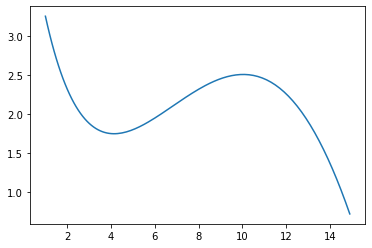

In [29]:
%matplotlib inline
from matplotlib import pylab as plt
x = np.arange(1, 15, 0.1)
y = f(x)
plt.plot(x, y)
plt.show()

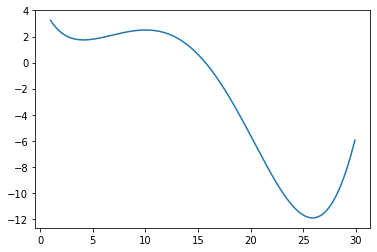

In [69]:
x = np.arange(1, 30, 0.1)
y = f(x)
plt.plot(x, y)
plt.show()

In [35]:
x_min = optimize.minimize(f, 2, method='BFGS')
print (x_min)

      fun: 1.7452682903447336
 hess_inv: array([[5.98752645]])
      jac: array([-2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627628])


In [36]:
x_min = optimize.minimize(f, 30, method='BFGS')
print (x_min)

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])


## Задача 2. Глобальная оптимизация

    1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
    2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
    3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
    4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
    5. Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
    6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [42]:
bound = [(1, 30)]
result = optimize.differential_evolution(f, bound)
print (result)

     fun: array([-11.89889467])
     jac: array([8.8817842e-07])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 4
 success: True
       x: array([25.88019472])


## Задача 3. Минимизация негладкой функции

    1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
    2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.
    3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
    4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.
    5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).
    6. Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [65]:
# функцию h(x) = int(f(x)) на том же отрезке [1, 30],
# т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения
def h(x):
    return np.int_(f(x))

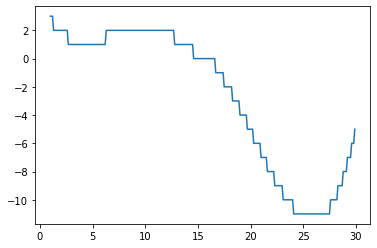

In [66]:
%matplotlib inline
from matplotlib import pylab as plt
x = np.arange(1, 30, 0.1)
y = h(x)
plt.plot(x, y)
plt.show()

In [71]:
# минимум функции h(x) с помощью BFGS
x_min = optimize.minimize(h, 30, method='BFGS')
print (x_min)

      fun: array([-5])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])


In [72]:
for i in range (1, 30, 3):
    x_min = optimize.minimize(h, i, method='BFGS' )
    print('For start number: ', i, '\n', x_min,'\n')

For start number:  1 
       fun: array([3])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1.]) 

For start number:  4 
       fun: array([1])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([4.]) 

For start number:  7 
       fun: array([2])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([7.]) 

For start number:  10 
       fun: array([2])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([10.]) 

For start number:  13 
       fun: array([1])
 hess_in

In [73]:
# минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции
bound = [(1, 30)]
result = optimize.differential_evolution(h, bound)
print (result)

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 62
     nit: 3
 success: True
       x: array([25.8608851])


In [75]:
# минимум h(x) на отрезке [1, 30] с помощью метода Нелдера-Мида
for i in range (1, 30, 3):
    x_min = optimize.minimize(h, i, method='Nelder-Mead' )
    print('For start number: ', i, '\n', x_min,'\n')

For start number:  1 
  final_simplex: (array([[1.        ],
       [1.00009766]]), array([3., 3.]))
           fun: 3.0
       message: 'Optimization terminated successfully.'
          nfev: 29
           nit: 10
        status: 0
       success: True
             x: array([1.]) 

For start number:  4 
  final_simplex: (array([[4.        ],
       [4.00009766]]), array([1., 1.]))
           fun: 1.0
       message: 'Optimization terminated successfully.'
          nfev: 35
           nit: 12
        status: 0
       success: True
             x: array([4.]) 

For start number:  7 
  final_simplex: (array([[7.        ],
       [7.00008545]]), array([2., 2.]))
           fun: 2.0
       message: 'Optimization terminated successfully.'
          nfev: 38
           nit: 13
        status: 0
       success: True
             x: array([7.]) 

For start number:  10 
  final_simplex: (array([[10.        ],
       [10.00006104]]), array([2., 2.]))
           fun: 2.0
       message: 'Optimiz

In [4]:
0.49**2 + 0.38*(0.49 + 0.38)+ 0.1*(0.49+0.1)+0.03*(0.49+0.38+0.1+0.03)

0.6597

In [2]:
0.6*0.1+0.4*0.15

0.12

In [3]:
0.1*0.6/0.12

0.5

In [5]:
10* 0.2 * 0.8**9


0.2684354560000001

In [6]:
0.01*0.8+0.99*0.096

0.10303999999999999